---
title: "Dimensionality Reduction"
format:
  html:
    toc: true
    code-fold: true
---

## Project Proposal

The goal of this project is to predict and mitigate the occurance of wildfire. Under this tab, we will perform dimensionality reduction on the `CA_climate_fire` dataset. 

PCA seeks to capture the maximum variance in the data with the fewest number of principal components. By doing so, it aims to retain the most significant features that explain the patterns in the data.By reducing the number of features, PCA can help in mitigating the risk of overfitting in predictive models. The project can benefit from PCA by understanding which variables (like temperature, humidity, etc.) contribute most to the variance and possibly to wildfire occurrences.

Unlike PCA, t-SNE is a non-linear technique, which makes it capable of capturing complex non-linear relationships between features. t-SNE excels at identifying clusters in data, which can be very useful for detecting patterns related to wildfire occurrences. t-SNE may reveal groupings and relationships in the data that PCA might not, due to its non-linear approach.

## Dataset Loading

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# GET DATASET
CA_climate_fire = pd.read_csv('../data/cleaned-data/CA_climate_fire.csv')
print(CA_climate_fire.head())

X= CA_climate_fire[['tempmax', 'tempmin', 'humidity', 'precip', 'windspeed']]
Y= CA_climate_fire[['fire']]

print(X.shape)

     datetime  tempmax  tempmin  humidity  precip  windspeed  AcresBurned  \
0  2020-01-01     14.3      5.4      85.7   0.000       11.2          NaN   
1  2020-01-02     17.0      4.2      78.1   0.000       19.0          NaN   
2  2020-01-03     15.0      3.8      83.0   0.000        9.0          NaN   
3  2020-01-04     13.6      5.7      89.6   1.736       16.7          NaN   
4  2020-01-05     15.1      3.2      80.9   0.000       16.2          NaN   

  Cause  Fatalities  StructureDam fire  StructureDest.  StructureDam.  \
0   NaN         NaN           NaN   No             NaN            NaN   
1   NaN         NaN           NaN   No             NaN            NaN   
2   NaN         NaN           NaN   No             NaN            NaN   
3   NaN         NaN           NaN   No             NaN            NaN   
4   NaN         NaN           NaN   No             NaN            NaN   

   FirePersonnelDeath  CivilDeath  
0                 NaN         NaN  
1                 NaN     

We began by importing the `CA_climate_fire`` dataset and inspecting the initial few rows to understand the structure. The dataset includes features such as maximum and minimum temperatures, humidity, precipitation, and wind speed.

## Principal Component Analysis (PCA)

PCA was implemented to reduce the dimensionality of our feature set. We aimed to capture the most variance with the least number of components while enabling a 2D visualization of our high-dimensional data.

With 1 components, cumulative explained variance: 0.7356
With 2 components, cumulative explained variance: 0.8772
With 3 components, cumulative explained variance: 0.9599
Optimal number of components: 3


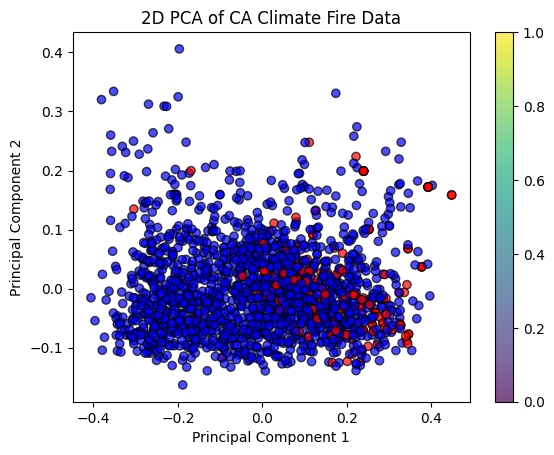

In [2]:
#NORMALIZE
X=X/np.max(X) 

#COMPUTE PCA
from sklearn.decomposition import PCA
Y_mapped = Y['fire'].map({'No': 0, 'Yes': 1}).values

# Perform PCA
cumulative_variance_threshold = 0.95  # 95% variance threshold

for n in range(1, X.shape[1] + 1):  # Loop from 1 to the number of features in X
    pca = PCA(n_components=n)
    X1 = pca.fit_transform(X)
    cumulative_variance = np.sum(pca.explained_variance_ratio_)
    print(f"With {n} components, cumulative explained variance: {cumulative_variance:.4f}")
    if cumulative_variance >= cumulative_variance_threshold:
        break

print(f"Optimal number of components: {n}")


color_map = ['blue', 'red']  # Define a list of colors

# Plot the points with alpha blending for better visibility of overlapping points
plt.scatter(X1[:, 0], X1[:, 1], c=[color_map[label] for label in Y_mapped.flatten()], alpha=0.7, edgecolor='k')

# Adding labels and title for better understanding of the plot
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('2D PCA of CA Climate Fire Data')

# Display a color bar for reference
plt.colorbar()

plt.show()

We determined that three principal components captured over 95% of the variance within our dataset, which is a significant reduction from the five original features. The 2D scatter plot using the first two principal components revealed some degree of separation between days with wildfires (red) and without (blue), hinting at underlying patterns correlating with fire occurrences.

The plot suggests that there may be identifiable patterns in the climate data that correlate with wildfire events. The components that carry the most weight in terms of variance might be the most relevant predictors for wildfires.

## t-Distributed Stochastic Neighbor Embedding (t-SNE)

t-SNE was used to visualize the dataset in a 2D space to see if there are distinct clusters corresponding to the days with and without wildfires.

Perplexity in t-SNE is a hyperparameter that determines how to balance attention between local and global aspects of our data. It's akin to the number of nearest neighbors that each point considers when mapping the high-dimensional data to a lower-dimensional space. Higher perplexity values consider more neighbors for a broader context.

In this case, we will explore the results of t-SNE with different perplexity values (30, 50, 1) in order to see how the data points cluster.

RESULTS
shape :  (1872, 3)
First few points : 
 [[  8.744666    3.138517  -10.389686 ]
 [  4.903321    0.0216501  -6.5611925]]


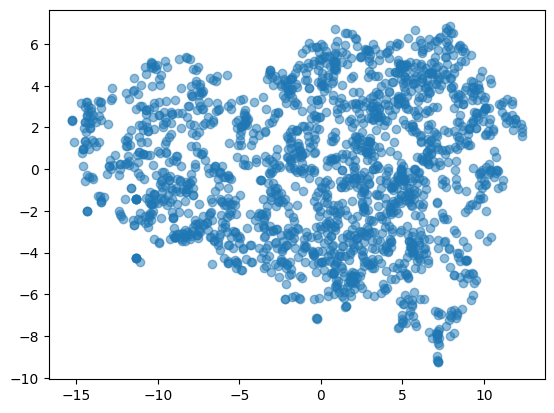

In [3]:
from sklearn.manifold import TSNE


# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=30).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (1872, 3)
First few points : 
 [[ 7.0168204  -2.4403467   9.426487  ]
 [ 5.094756   -0.08218412  5.409552  ]]


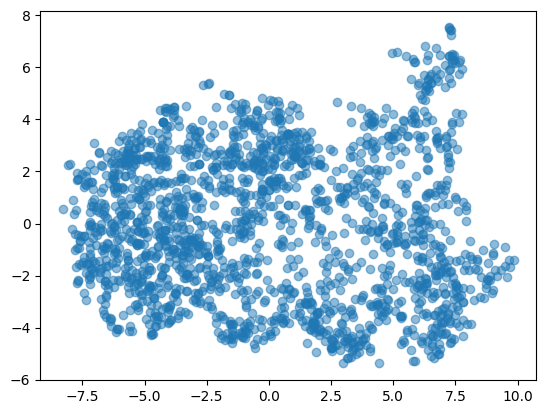

In [8]:
# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=50).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

RESULTS
shape :  (1872, 3)
First few points : 
 [[-6.296935  10.623576  27.319828 ]
 [ 5.7153225  1.0619602 15.728415 ]]


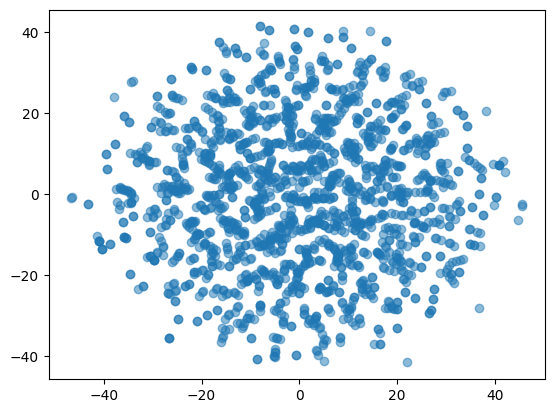

In [6]:
# DO DIMENSIONALITY REDUCTION
X_embedded = TSNE(n_components=3, learning_rate='auto',init='random', perplexity=1).fit_transform(X)

# EXPLORE RESULTS
print("RESULTS") 
print("shape : ",X_embedded.shape)
print("First few points : \n",X_embedded[0:2,:])

# PLOT 
plt.scatter(X_embedded[:,0],X_embedded[:,1], alpha=0.5)
plt.show()

The t-SNE visualizations indicated that the dataset contains complex, non-linear relationships. While some clusters emerged, they were more diffuse than those in the PCA, especially at lower perplexities, reflecting the sensitivity of t-SNE to this hyperparameter.

## Comparisons and Insights

Comparing PCA and t-SNE, we observed that PCA provided a clearer separation between classes, which might be beneficial for linear predictive modeling. However, t-SNE offered valuable insights into local structures and relationships that are not linearly separable.

Both PCA and t-SNE have illuminated aspects of our data that could be crucial for predicting wildfire occurrences. PCA showed a promising direction for feature reduction in predictive modeling, while t-SNE provided a deeper understanding of data structure complexities.

The next steps include using the insights from these dimensionality reduction techniques to inform the feature selection for machine learning models aimed at predicting wildfire occurrences. Additionally, we plan to investigate the specific climate features that most strongly predict wildfires, as indicated by their weights in the principal components.